In [35]:
#%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator
from qiskit.compiler import transpile, assemble
from qiskit.tools.monitor import job_monitor
import matplotlib.pyplot as plt
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info import *
import numpy as np
#provider = IBMQ.load_account()

    
# Loading your IBM Q account(s)
#provider = IBMQ.load_account()

#contants
n = 4
lambd = 1.2

def thetak(k):
    num = lambd - np.cos(2*np.pi*k/n)
    denom = np.sqrt( (lambd-np.cos(2*np.pi*k/n))**2 + np.sin(2*np.pi*k/n)**2)
    theta = np.arccos(num/denom)
    return theta

#Create functions based on the decomposition included in appendix of Ising paper
def bog(qcirc, q1, q2, theta):
    qcirc.x(q2)
    qcirc.cx(q2, q1)
    #Controlled RX gate
    qcirc.rz(np.pi/2, q2)
    qcirc.ry(theta/2, q2)
    qcirc.cx(q1, q2)
    qcirc.ry(-theta/2, q2)
    qcirc.cx(q1, q2)
    qc.rz(-np.pi/2, q2)
    #####################
    qcirc.cx(q2, q1)
    qcirc.x(q2)
    qcirc.barrier()
    return qcirc
    
def fourier(qcirc, q1, q2, phase):
    qcirc.rz(phase, q1)
    qcirc.cx(q1, q2)
    #Controlled Hadamard
    qcirc.sdg(q1)
    qcirc.h(q1)
    qcirc.tdg(q1)
    qcirc.cx(q2, q1)
    qcirc.t(q1)
    qcirc.h(q1)
    qcirc.s(q1)
    ####################
    qcirc.cx(q1, q2)
    qcirc.cz(q1, q2)
    qcirc.barrier()
    return qcirc


def ground_state(lamb):
    qc = QuantumCircuit(4, 4)
    #Set correct ground state if lambda < 1
    if lambd < 1:
        qc.x(3)
        qc.barrier()

    #Apply disentangling gates
    qc = bog(qc, 0, 1, thetak(1.))
    qc = fourier(qc, 0, 1, 2*np.pi/n)
    qc = fourier(qc, 2, 3, 0.)
    qc = fourier(qc, 0, 1, 0.)
    qc = fourier(qc, 2, 3, 0.)
    #Set measurement step
    for i in range(0,4):
        qc.measure(i,i)
        
    backend = Aer.get_backend('statevector_simulator')
    shots = 1024
    max_credits = 10 #Max number of credits to spend on execution
    job = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
    job_monitor(job)
    result = job.result()
    counts = result.get_counts(qc)
    #Check what ground state is based on lambda
    if lamb < 1:
        return counts['0001']/shots
    return counts['0000']/shots



print(ground_state(lambd))



Job Status: job has successfully run
0.0009765625


In [33]:
lmbd = np.arange(1.2, 1.75, 0.05)
sigmaz = []
for l in lmbd:
    sigmaz.append(ground_state(l))
    
print(sigmaz)



Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
[0.880859375, 0.8896484375, 0.87890625, 0.900390625, 0.8828125, 0.888671875, 0.892578125, 0.8720703125, 0.884765625, 0.8916015625, 0.87890625]


(0.0, 1.8)

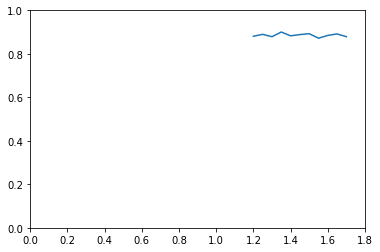

In [39]:
plt.plot(lmbd, sigmaz)
plt.ylim(0., 1.)
plt.xlim(0., 1.8)

$ \newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$ \newcommand{\bra}[1]{\left\langle{#1}\right|}$
$$ \newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

when it comes to implementation:  
first try to run circuit on simulator 
second try to run on real hardware

long term goal is reproduce figures 5 (Ground state of a spin chain)and 6 (time evolution of operator $\sigma_z$) 

short term goal is initialize the state to  $ \ket{0000}  $ and $\ket{ 1100} $

Job Status: job has successfully run


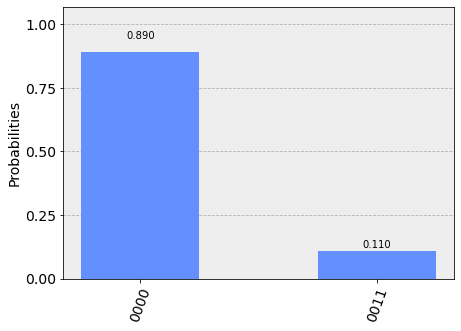

In [13]:
#Start up and initialize circuit
#Measurement

    
    #Choose provider and backend
#provider = IBMQ.get_provider()
#provider = AerProvider()
#backend = Aer.get_backend('statevector_simulator')
backend = Aer.get_backend('qasm_simulator')
#backend = provider.get_backend('ibmq_qasm_simulator')
#backend = provider.get_backend('ibmqx4')
#backend = provider.get_backend('ibmqx2')
#backend = provider.get_backend('ibmq_16_melbourne')

shots = 1024
max_credits = 10 #Max number of credits to spend on execution
job = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)



In [14]:
phi = np.arccos(lambd/np.sqrt(1+lambd**2))/2
#print(result.get_statevector(qc))
print("|0000> probability should be: ",np.cos(phi)**2)
print("|0011> probability should be: ",np.sin(phi)**2 )

|0000> probability should be:  0.8841106397986879
|0011> probability should be:  0.11588936020131207


In [18]:
print(counts['0000'])

911
